# Импорт библиотек

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score,recall_score,accuracy_score,fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_olivetti_faces
import warnings
import time
from sklearn.exceptions import ConvergenceWarning

# 1. Загрузите датасет Olivetti faces

In [87]:
df = fetch_olivetti_faces()

# 3 Выведите информацию о количественных параметрах датасета;

In [7]:
print(df.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [88]:
X = df['data']
y = df['target']

# 4 Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;

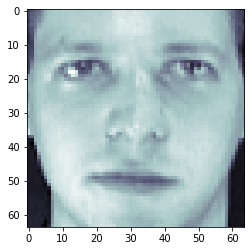

In [18]:
plt.imshow(X[0].reshape(64,64), cmap=plt.cm.bone)

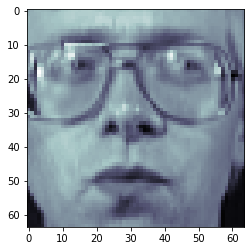

In [19]:
plt.imshow(X[12].reshape(64,64), cmap=plt.cm.bone)

# 5. Разделите эти данные на тестовую и обучающую выборки


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
Counter(y)

Counter({1: 268, 0: 500})

# 6. Постройте модель классификации для определения заболевания

In [21]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('log_reg', SVC(max_iter = 1000))])

In [22]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 7 Оцените качество модели на тестовой выборке с помощью следующих метрик:
# достоверность предсказания (accuracy);
# точность (precision);
# полнота (recall);
# 8 Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей #выборки.


In [23]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [28]:
metrics = {}

C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.8875, 'precision': 0.8995833333333334, 'recall': 0.8875, 'f1': 0.8740773809523809, 'f0.5': 0.8812860956739677, 'f2': 0.8790903234837059}


<module 'matplotlib.pyplot' from 'C:\\Users\\Vladc\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

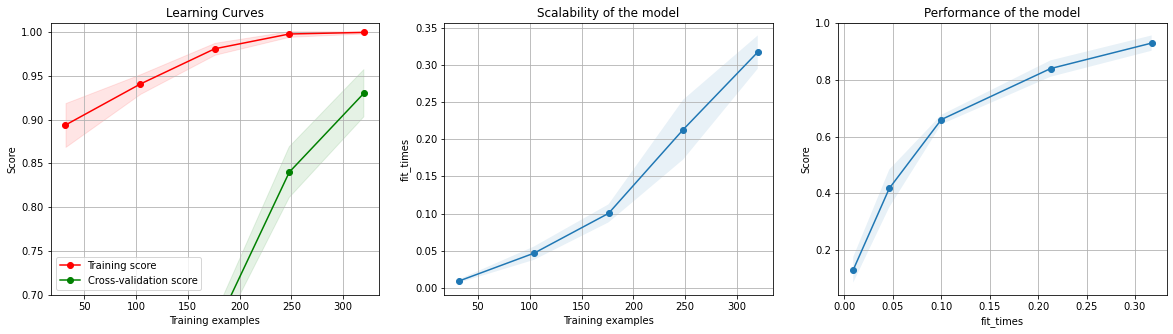

In [29]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


metrics['SVC'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred, average='weighted'),
                     'recall':recall_score(y_test, y_pred,average='weighted'),
                     'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                     'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted')}

print(metrics['SVC'])


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

# 9. Сделайте вывод о применимости модели.

In [15]:
#по всем метрикам модель очень неплохая

# Дополнительные задания
# 1 Постройте модели классификации на основе следующих методов:
# логистическая регрессия (LogisticRegression);
# метод опорных векторов с гауссовым ядром (SVC);
# метод опорных векторов с полиномиальным ядром (SVC);
# метод k ближайших соседей (KNeighborsClassifier);
# многослойный перцептрон (MLP);


SVC(kernel ="poly",max_iter = 1000)


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.4625, 'precision': 0.56875, 'recall': 0.4625, 'f1': 0.49124999999999996, 'f0.5': 0.525081168831169, 'f2': 0.47168848308554184, 'time': 0.2720615863800049}


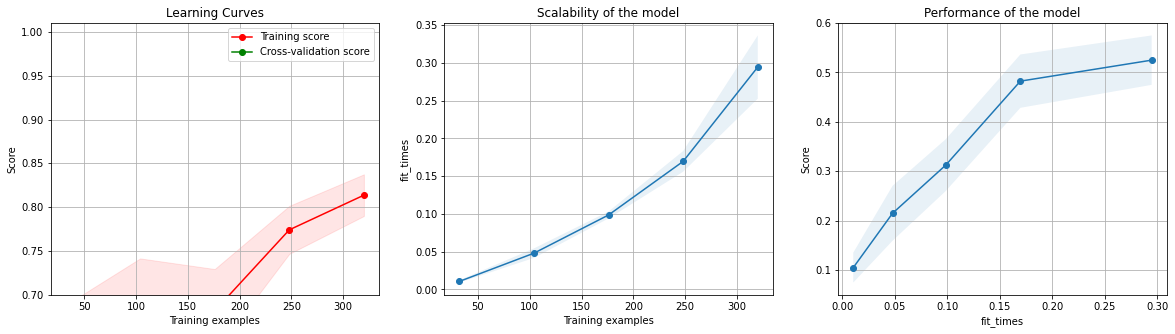

MLPClassifier()


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.95, 'precision': 0.9226190476190474, 'recall': 0.95, 'f1': 0.9342307692307692, 'f0.5': 0.926890756302521, 'f2': 0.9430351906158357, 'time': 0.8261904716491699}


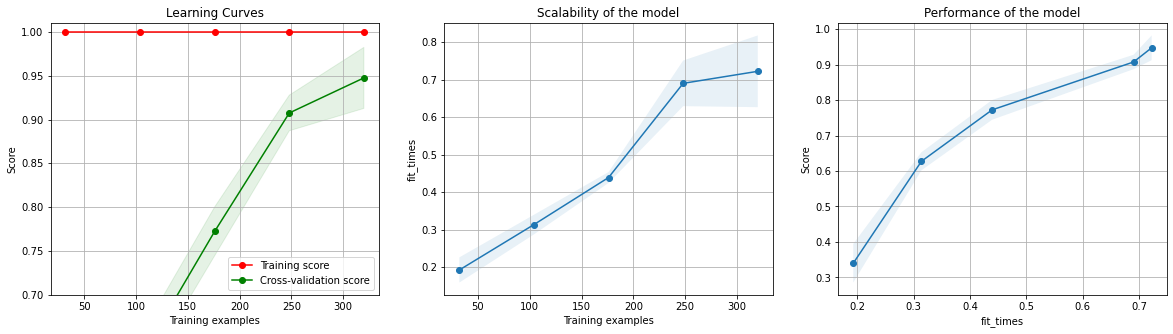

KNeighborsClassifier()
{'accuracy': 0.7875, 'precision': 0.8583630952380952, 'recall': 0.7875, 'f1': 0.7877083333333333, 'f0.5': 0.8162861308915325, 'f2': 0.7812961266352326, 'time': 0.03500843048095703}


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


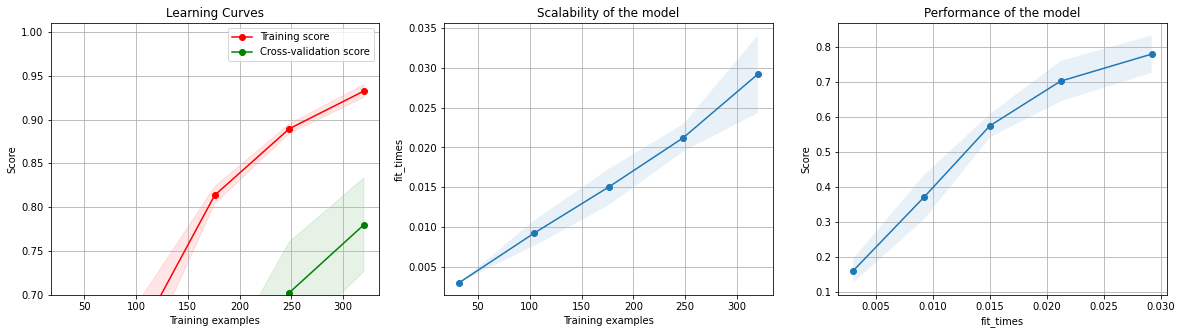

SVC(kernel ="rbf",max_iter = 1000)


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.8875, 'precision': 0.8995833333333334, 'recall': 0.8875, 'f1': 0.8740773809523809, 'f0.5': 0.8812860956739677, 'f2': 0.8790903234837059, 'time': 0.38408660888671875}


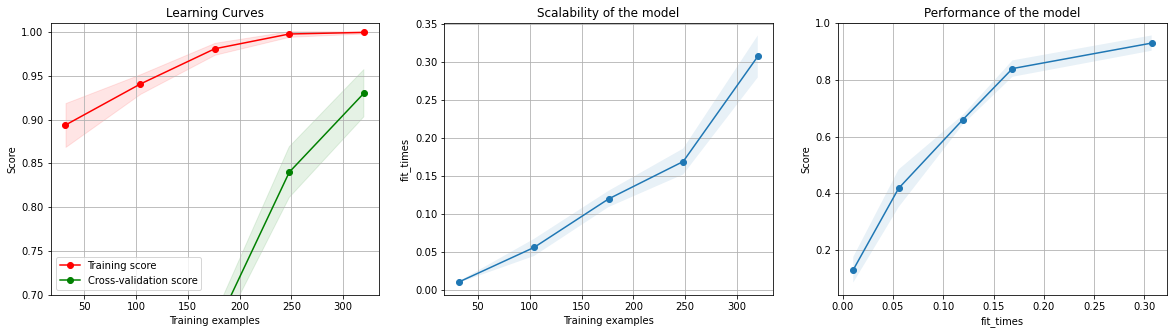

LogisticRegression(max_iter = 1000)


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.9625, 'precision': 0.9729166666666667, 'recall': 0.9625, 'f1': 0.9616666666666666, 'f0.5': 0.9664682539682541, 'f2': 0.9609217171717173, 'time': 8.371103763580322}


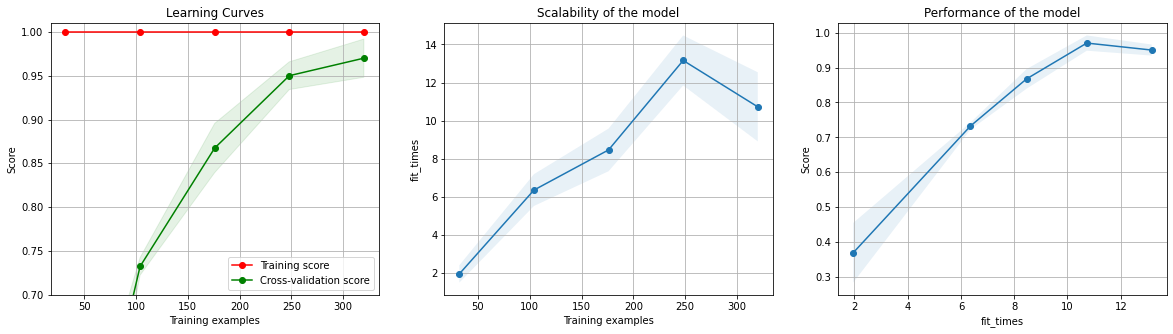

In [51]:
models = ['SVC(kernel ="poly",max_iter = 1000)','MLPClassifier()',\
          'KNeighborsClassifier()'\
          ,'SVC(kernel ="rbf",max_iter = 1000)','LogisticRegression(max_iter = 1000)']
metrics = {}
for model in models:
    print(model)
    pipeline = Pipeline([('scaler', StandardScaler()),
                         ('model', eval(model))])
    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    stop = time.time()

    metrics[model] = {'accuracy':accuracy_score(y_test, y_pred),
                         'precision':precision_score(y_test, y_pred, average='weighted'),
                         'recall':recall_score(y_test, y_pred,average='weighted'),
                         'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
                                        
    print(metrics[model])


    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    title = "Learning Curves"
    plot = plot_learning_curve(
        pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
    )
    plot.show()

# 2. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;


In [52]:
pd.DataFrame(metrics)

,"SVC(kernel =""poly"",max_iter = 1000)",MLPClassifier(),KNeighborsClassifier(),"SVC(kernel =""rbf"",max_iter = 1000)",LogisticRegression(max_iter = 1000)
accuracy,0.462500,0.950000,0.787500,0.887500,0.962500
precision,0.568750,0.922619,0.858363,0.899583,0.972917
recall,0.462500,0.950000,0.787500,0.887500,0.962500
f1,0.491250,0.934231,0.787708,0.874077,0.961667
f0.5,0.525081,0.926891,0.816286,0.881286,0.966468
f2,0.471688,0.943035,0.781296,0.879090,0.960922
time,0.272062,0.826190,0.035008,0.384087,8.371104


In [53]:
#по всем метрикам логичтическая регрессия оказалось наилучшией, тем не менее эффективность страдает
#обучение выполняется в дестяки раз дольше, чем в случае с другими моделями

# 5. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.

In [90]:
C = np.linspace(1,3,5)
f2 = []
recall = []
for i in C:
    model = LogisticRegression(C = i,max_iter = 1000)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    recall.append(recall_score(y_test, y_pred, average ='weighted'))

C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:760: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:300: RuntimeWarning: invalid value encountered in double_scalars
  loss += 0.5 * alpha * squared_norm(w)
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:352: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] += alpha * w
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

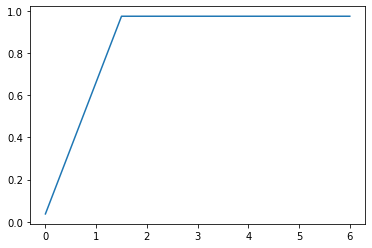

In [91]:
plt.plot(C,recall)

In [93]:
accuracy_score(y_test, y_pred)

0.975

In [94]:
precision_score(y_test, y_pred, average ='weighted')

C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.978125

In [136]:
def show_image(number):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.imshow(X_test[number].reshape(64,64), cmap=plt.cm.bone)
    if(y_pred[number]==y_test[number]):
        color = 'g'
    else:
        color = 'r'
    rect = plt.Rectangle(
        # (lower-left corner), width, height
        (0.2, 0.1), 0.6, 0.85, fill=False, color=color, lw=4, 
        zorder=1000, transform=fig.transFigure, figure=fig
    )
    fig.patches.extend([rect])

    plt.tight_layout()
    plt.show()

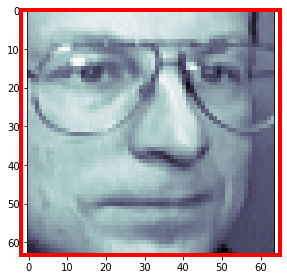

In [145]:
show_image(1)

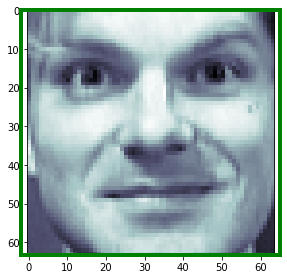

In [146]:
show_image(10)